# baca data

In [40]:
import pandas as pd
import numpy as np
import numpy as array

#untuk split data  
from sklearn.model_selection import train_test_split  
  
#untuk kebutuhan pengujian  
import tensorflow as tf  
from tensorflow.keras.preprocessing.text import Tokenizer  
from tensorflow.keras.preprocessing.sequence import pad_sequences  
from sklearn.preprocessing import LabelEncoder  
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Dense, Embedding, Activation, Dropout, Input  
from tensorflow.keras.optimizers import Adam  
from tensorflow.keras.models import Model  
from keras.layers import SimpleRNN, LSTM, Bidirectional  
from sklearn.metrics import confusion_matrix, classification_report, f1_score  
from keras import backend as K  
from keras.utils.vis_utils import plot_model

#visualisasi gambar  
import matplotlib.pyplot as plt  
import matplotlib as mpl  
import seaborn as sns  
import plotly.express as px  

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
df = pd.read_csv("/content/drive/My Drive/Skripsi/labelisasi_dataset_new.csv")
df

,review_clean,label_negatif,label_positif
0,ya ngga cek kalo mall sedia barcodenya,1,0
1,good,0,1
2,mantap,0,1
3,best applications,0,1
4,mantap,0,1
...,...,...,...
208670,bagus,0,1
208671,tingkat servis,0,1
208672,dcek sedia vaksin faskes vaksin notif sih pedu...,1,0
208673,aplikasi guna informatif,0,1


In [43]:
df = df.dropna(axis=0)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201307 entries, 0 to 208674
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   review_clean   201307 non-null  object
 1   label_negatif  201307 non-null  int64 
 2   label_positif  201307 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 6.1+ MB


In [45]:
df["label_negatif"].value_counts()

0    108564
1     92743
Name: label_negatif, dtype: int64

In [46]:
df["label_positif"].value_counts()

1    108564
0     92743
Name: label_positif, dtype: int64

# SPLIT DATA

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
y =  df[df.columns[1:]].values

In [49]:
X = []

sentences = list(df["review_clean"])
for sen in sentences:
    X.append(sen)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

# PARAMETER

In [51]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [52]:
# Defining the num of words
tokenizer = Tokenizer(num_words=5000)
# Fighting in the X df
tokenizer.fit_on_texts(X)

# Tokenizing Train and test

X_prep = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

seq = tokenizer.texts_to_sequences(X)

vocab_size = len(tokenizer.word_index) + 1

# Setting the max length of features

max_length = 80

# Ensuring the all sequences have the same length
X_train = pad_sequences(X_prep, padding='post', maxlen=max_length)
X_test = pad_sequences(X_test, padding='post', maxlen=max_length)

# EMBEDDING

In [53]:
import gzip
from urllib.request import urlopen
from numpy import array
from numpy import asarray
from numpy import zeros

## WORD SEQUENCE

In [54]:
word_index = tokenizer.word_index
print(tokenizer.word_index)
print('Found %s unique tokens' % len(word_index))

{'aplikasi': 1, 'ngga': 2, 'vaksin': 3, 'sertifikat': 4, 'nya': 5, 'bagus': 6, 'masuk': 7, 'bantu': 8, 'ya': 9, 'ok': 10, 'daftar': 11, 'tanggal': 12, 'buka': 13, 'kali': 14, 'muncul': 15, 'data': 16, 'susah': 17, 'tolong': 18, 'mantap': 19, 'lahir': 20, 'baik': 21, 'banget': 22, 'error': 23, 'handphone': 24, 'update': 25, 'nomor': 26, 'pakai': 27, 'nik': 28, 'good': 29, 'mudah': 30, 'cek': 31, 'mohon': 32, 'isi': 33, 'login': 34, 'kasih': 35, 'email': 36, 'kode': 37, 'bikin': 38, 'download': 39, 'sih': 40, 'ribet': 41, 'coba': 42, 'manfaat': 43, 'kalo': 44, 'peduli': 45, 'terimakasih': 46, 'lindung': 47, 'terima': 48, 'pedulilindungi': 49, 'orang': 50, 'guna': 51, 'otp': 52, 'salah': 53, 'nama': 54, 'sms': 55, 'verifikasi': 56, 'akun': 57, 'kirim': 58, 'covid': 59, 'suruh': 60, 'deh': 61, 'baru': 62, 'akses': 63, 'ulang': 64, 'oke': 65, 'sulit': 66, 'gagal': 67, 'tulis': 68, 'sesuai': 69, 'moga': 70, 'lihat': 71, 'lokasi': 72, 'cepat': 73, 'scan': 74, 'bintang': 75, 'vaksinasi': 76, '

In [55]:
print(X[0])
print(seq[0])

ya ngga cek kalo mall sedia barcodenya
[9, 2, 31, 44, 108, 165, 1368]


## WORD EMBEDDING FASTTEXT

In [56]:
embeddings_index = {}
fasttext_file= gzip.open(urlopen('https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.id.300.vec.gz'))

for line in fasttext_file:
    records = line.split()
    word = records[0].decode('utf-8')
    vector_dimensions = np.asarray(records[1:], dtype='float32')
    embeddings_index[word] = vector_dimensions
fasttext_file.close()

print('found %s word vectors' % len(embeddings_index))

found 2000000 word vectors


In [57]:
print(embeddings_index.get('update'))
print(embeddings_index.get('sertifikat').shape)
print(embeddings_index.get('vaksin'))

[-0.0326  0.0522 -0.0375  0.0346  0.0823  0.0824  0.0424  0.021  -0.0443
 -0.0555  0.0093 -0.0802 -0.0614  0.0286  0.0341 -0.0425  0.0005  0.0591
  0.0048 -0.098  -0.0265  0.0114  0.0287  0.0618  0.0426 -0.0529  0.0113
  0.0298  0.0391  0.023   0.0636 -0.009   0.0239  0.0255 -0.0175  0.0469
 -0.0165  0.0358  0.0433  0.043   0.0585  0.0317 -0.0138 -0.0805  0.0055
  0.0063  0.0017 -0.1046  0.0246  0.02    0.0077 -0.0213  0.0098 -0.0497
  0.0718  0.0688  0.056  -0.0155 -0.0186  0.0117 -0.0358  0.0868 -0.0503
  0.0802  0.0755 -0.0113  0.005   0.086  -0.0127 -0.0069  0.0349  0.0232
 -0.0194 -0.0376  0.0277  0.042   0.0459 -0.0723  0.0351  0.0772  0.1018
 -0.0252  0.014  -0.073  -0.0309  0.0119  0.0241 -0.0509 -0.0911  0.0609
  0.0482  0.0112 -0.0416  0.0308 -0.0377 -0.0636  0.0363 -0.0322  0.0345
  0.0162 -0.0083  0.0268 -0.0007 -0.0206  0.0128 -0.0894  0.1814 -0.071
 -0.0102  0.0226 -0.0586 -0.075   0.006   0.1327 -0.0355  0.0273 -0.0144
 -0.0187  0.0609  0.0233 -0.1462 -0.0148 -0.0084 -0.

In [58]:
embed_dim = 300

In [59]:
embedding_matrix = np.zeros((vocab_size, embed_dim))
unidentified_words = []
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
    else :
      unidentified_words.append(word)
print('number of null word embeddings: %d' % np.sum(np.sum(embedding_matrix, axis=1) == 0))

number of null word embeddings: 16447


In [60]:
print("sample words not found: ", np.random.choice(unidentified_words, 10))

sample words not found:  ['berpatoan' 'jeleeekkk' 'mtap' 'kealpikasi' 'dvaksib' 'mesuntik'
 'bulusss' 'trpengaruh' 'cct' 'mngisinya']


In [61]:
print("Embedding Matrix shape: ", embedding_matrix.shape)

Embedding Matrix shape:  (34110, 300)


In [62]:
embedding_matrix[1]

array([ 0.0155,  0.0517, -0.013 ,  0.0371, -0.0123, -0.018 , -0.0299,
        0.0198, -0.0203, -0.0428,  0.061 ,  0.0341,  0.0157, -0.0137,
        0.028 ,  0.0245, -0.0199,  0.0059, -0.0423, -0.022 , -0.0517,
       -0.0122, -0.0027,  0.0284, -0.0023,  0.0036, -0.0162, -0.0205,
        0.0248, -0.0048,  0.0259, -0.0072,  0.0148,  0.0026,  0.0294,
       -0.0223,  0.0101, -0.0255, -0.0033,  0.0228,  0.0357, -0.0215,
        0.0346, -0.0432,  0.0072,  0.0301, -0.0159,  0.0197,  0.0085,
       -0.0064, -0.0237, -0.0278,  0.0335, -0.0625, -0.0052,  0.044 ,
        0.0217,  0.011 ,  0.0393, -0.0409,  0.0003,  0.0188, -0.0217,
        0.0313,  0.0149, -0.0191,  0.0635,  0.0082,  0.0185,  0.0251,
        0.0115, -0.0263,  0.0046, -0.0442,  0.0299,  0.0126,  0.015 ,
       -0.0328,  0.0084, -0.0088,  0.087 ,  0.0247, -0.0088,  0.0005,
       -0.0126,  0.0577, -0.0143, -0.0503, -0.0182,  0.0317, -0.0071,
       -0.0037, -0.0142,  0.037 , -0.0334, -0.0725,  0.0122,  0.0127,
        0.0222,  0.0

In [63]:
# Menampilkan ukuran X_train, y_train, X_test, dan y_test
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(130849, 80) (130849, 2)
(70458, 80) (70458, 2)


#pemodelan simplernn

In [83]:
model_SimpleRNN = Sequential()

model_SimpleRNN.add(Embedding(vocab_size, 300,input_length=max_length, weights=[embedding_matrix],trainable=False))
model_SimpleRNN.add(SimpleRNN(32))
model_SimpleRNN.add(Dense(32,activation='relu'))
model_SimpleRNN.add(Dropout(0.4))
model_SimpleRNN.add(Dense(2,activation='sigmoid'))
model_SimpleRNN.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_SimpleRNN.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 80, 300)           10233000  
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 32)                10656     
                                                                 
 dense_10 (Dense)            (None, 32)                1056      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_11 (Dense)            (None, 2)                 66        
                                                                 
Total params: 10,244,778
Trainable params: 11,778
Non-trainable params: 10,233,000
_________________________________________________________________


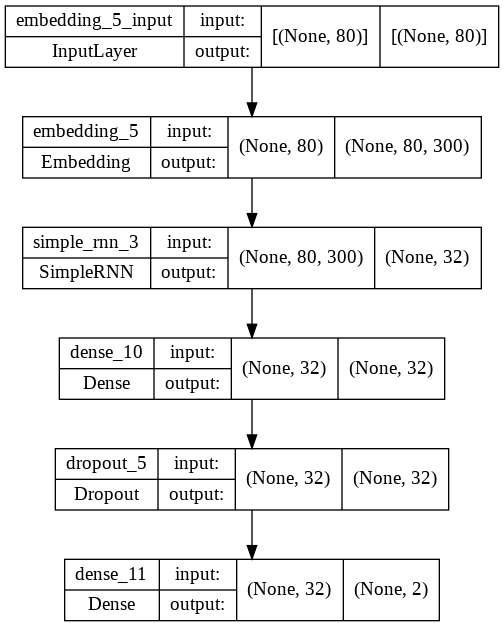

In [84]:
from tensorflow.keras.utils import plot_model

plot_model(model_SimpleRNN, to_file='model_plot4a.png', show_shapes=True, show_layer_names=True)

In [85]:
from tensorflow.keras.callbacks import EarlyStopping
es_callback = EarlyStopping(monitor='val_loss', patience=3)

history_SimpleRNN = model_SimpleRNN.fit(X_train, y_train, batch_size=32,
          epochs=15, validation_split=0.3, callbacks=[es_callback], shuffle=False)

Epoch 1/15
2863/2863 [==============================] - 69s 24ms/step - loss: 0.3661 - accuracy: 0.8584 - val_loss: 0.3228 - val_accuracy: 0.8749
Epoch 2/15
2863/2863 [==============================] - 68s 24ms/step - loss: 0.3397 - accuracy: 0.8710 - val_loss: 0.3173 - val_accuracy: 0.8752
Epoch 3/15
2863/2863 [==============================] - 70s 24ms/step - loss: 0.3328 - accuracy: 0.8729 - val_loss: 0.3083 - val_accuracy: 0.8772
Epoch 4/15
2863/2863 [==============================] - 68s 24ms/step - loss: 0.3289 - accuracy: 0.8739 - val_loss: 0.3099 - val_accuracy: 0.8772
Epoch 5/15
2863/2863 [==============================] - 70s 25ms/step - loss: 0.3525 - accuracy: 0.8659 - val_loss: 0.3252 - val_accuracy: 0.8745
Epoch 6/15
2863/2863 [==============================] - 68s 24ms/step - loss: 0.3339 - accuracy: 0.8736 - val_loss: 0.3345 - val_accuracy: 0.8679


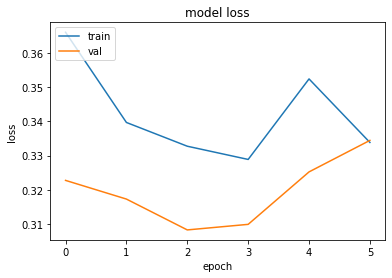

In [86]:
plt.plot(history_SimpleRNN.history['loss'])
plt.plot(history_SimpleRNN.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')

plt.show()

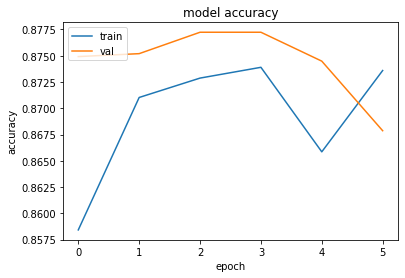

In [87]:
plt.plot(history_SimpleRNN.history['accuracy'])
plt.plot(history_SimpleRNN.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')
plt.show()

In [88]:
score_train = model_SimpleRNN.evaluate(X_train, y_train, verbose=1)
score_test = model_SimpleRNN.evaluate(X_test, y_test, verbose=1)

2202/2202 [==============================] - 20s 9ms/step - loss: 0.3370 - accuracy: 0.8673


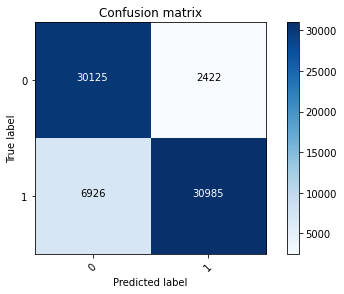

In [89]:
# Look at confusion matrix 
import itertools  

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model_SimpleRNN.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(2)) 

In [90]:
print(classification_report(Y_true, Y_pred_classes))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87     32547
           1       0.93      0.82      0.87     37911

    accuracy                           0.87     70458
   macro avg       0.87      0.87      0.87     70458
weighted avg       0.87      0.87      0.87     70458



#pemodelan lstm

In [91]:
model_LSTM = Sequential()

model_LSTM.add(Embedding(vocab_size, 300,input_length=max_length, weights=[embedding_matrix],trainable=False))
model_LSTM.add(LSTM(32))
model_LSTM.add(Dense(32,activation='relu'))
model_LSTM.add(Dropout(0.4))
model_LSTM.add(Dense(2,activation='sigmoid'))
model_LSTM.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_LSTM.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 80, 300)           10233000  
                                                                 
 lstm_2 (LSTM)               (None, 32)                42624     
                                                                 
 dense_12 (Dense)            (None, 32)                1056      
                                                                 
 dropout_6 (Dropout)         (None, 32)                0         
                                                                 
 dense_13 (Dense)            (None, 2)                 66        
                                                                 
Total params: 10,276,746
Trainable params: 43,746
Non-trainable params: 10,233,000
_________________________________________________________________


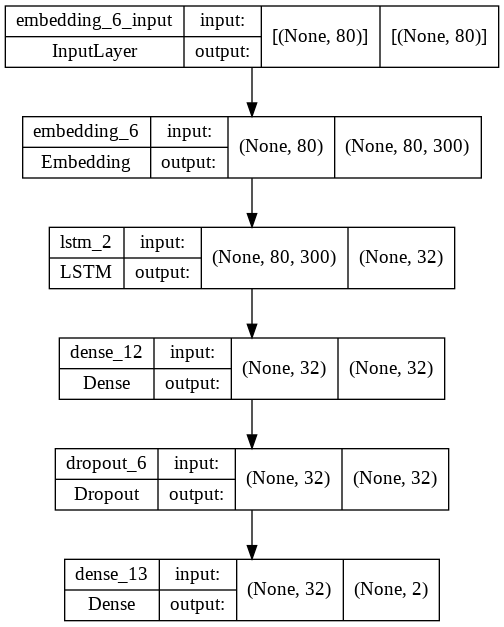

In [92]:
from tensorflow.keras.utils import plot_model

plot_model(model_LSTM, to_file='model_plot4a.png', show_shapes=True, show_layer_names=True)

In [93]:
from tensorflow.keras.callbacks import EarlyStopping
es_callback = EarlyStopping(monitor='val_loss', patience=3)

history_LSTM = model_LSTM.fit(X_train, y_train, batch_size=32, epochs=15, validation_split=0.3, callbacks=[es_callback], shuffle=False)

Epoch 1/15
2863/2863 [==============================] - 146s 50ms/step - loss: 0.5917 - accuracy: 0.6502 - val_loss: 0.5810 - val_accuracy: 0.6490
Epoch 2/15
2863/2863 [==============================] - 146s 51ms/step - loss: 0.5814 - accuracy: 0.6605 - val_loss: 0.4697 - val_accuracy: 0.8213
Epoch 3/15
2863/2863 [==============================] - 141s 49ms/step - loss: 0.5492 - accuracy: 0.7213 - val_loss: 0.6907 - val_accuracy: 0.5419
Epoch 4/15
2863/2863 [==============================] - 142s 49ms/step - loss: 0.6910 - accuracy: 0.5358 - val_loss: 0.6898 - val_accuracy: 0.5419
Epoch 5/15
2863/2863 [==============================] - 141s 49ms/step - loss: 0.6906 - accuracy: 0.5385 - val_loss: 0.6897 - val_accuracy: 0.5419


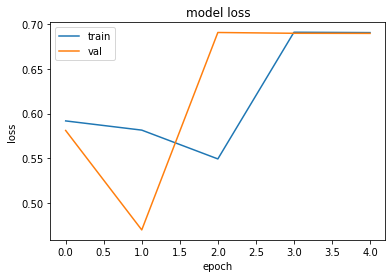

In [94]:
plt.plot(history_LSTM.history['loss'])
plt.plot(history_LSTM.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')

plt.show()

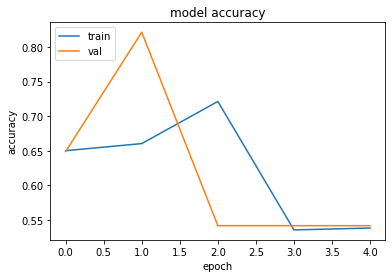

In [95]:
plt.plot(history_LSTM.history['accuracy'])
plt.plot(history_LSTM.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')
plt.show()

In [96]:
score_train = model_LSTM.evaluate(X_train, y_train, verbose=1)
score_test = model_LSTM.evaluate(X_test, y_test, verbose=1)

2202/2202 [==============================] - 32s 14ms/step - loss: 0.6903 - accuracy: 0.5381


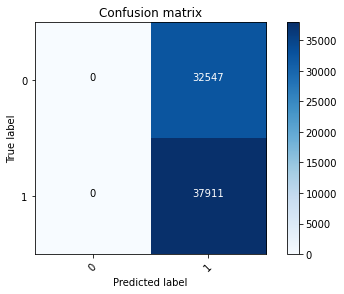

In [97]:
# Look at confusion matrix 
import itertools  

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model_LSTM.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(2)) 

In [98]:
print ("True Positive:" , (confusion_mtx[0,0]))
print ("True Negative:" , (confusion_mtx[1,1]))
print ("False Positive:" , (confusion_mtx[0,1]))
print ("False Negative:" , (confusion_mtx[1,0]))

True Positive: 0
True Negative: 37911
False Positive: 32547
False Negative: 0


In [99]:
print(classification_report(Y_true, Y_pred_classes))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     32547
           1       0.54      1.00      0.70     37911

    accuracy                           0.54     70458
   macro avg       0.27      0.50      0.35     70458
weighted avg       0.29      0.54      0.38     70458



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#pemodelan bidirectional

In [ ]:
model_Bidirectional = Sequential()

model_Bidirectional.add(Embedding(vocab_size, 300,input_length=max_length, weights=[embedding_matrix],trainable=False))
model_Bidirectional.add(Bidirectional(LSTM(128)))
model_Bidirectional.add(Dense(100,activation='relu'))
model_Bidirectional.add(Dropout(0.5))
model_Bidirectional.add(Dense(2,activation='sigmoid'))
model_Bidirectional.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_Bidirectional.summary()

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model_Bidirectional, to_file='model_plot4a.png', show_shapes=True, show_layer_names=True)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
es_callback = EarlyStopping(monitor='val_loss', patience=3)

history_Bidirectional = model_Bidirectional.fit(X_train, y_train, batch_size=1024,
          epochs=100, validation_split=0.3, callbacks=[es_callback], shuffle=False)

In [ ]:
plt.plot(history_Bidirectional.history['loss'])
plt.plot(history_Bidirectional.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')

plt.show()

In [ ]:
plt.plot(history_Bidirectional.history['accuracy'])
plt.plot(history_Bidirectional.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')
plt.show()

In [ ]:
score_train = model_Bidirectional.evaluate(X_train, y_train, verbose=1)
score_test = model_Bidirectional.evaluate(X_test, y_test, verbose=1)

In [ ]:
# Look at confusion matrix 
import itertools  

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model_Bidirectional.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(2)) 

In [ ]:
print(classification_report(Y_true, Y_pred_classes))